# Decision Tree Project 

In [21]:
import pandas as pd
import numpy as np

#For Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [4]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [5]:
df=sns.load_dataset('iris')

In [7]:
data=pd.DataFrame(df)

In [8]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
#Lets Do Data Summary
data.shape

(150, 5)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
print(data.apply(lambda col:col.unique()))

sepal_length    [5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.4, 4.8, 4.3, ...
sepal_width     [3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, 3.7, ...
petal_length    [1.4, 1.3, 1.5, 1.7, 1.6, 1.1, 1.2, 1.0, 1.9, ...
petal_width     [0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, ...
species                           [setosa, versicolor, virginica]
dtype: object


We have to change label in numbers because machine learning never understand alphabets.. with the Encoding Techniques.

# 0 - setosa, 1 - versicolor, 2- virginica

In [26]:
from sklearn.preprocessing import LabelEncoder

In [19]:
lab_enc=LabelEncoder()

In [23]:
df=lab_enc.fit_transform(data[['species']])
pd.Series(df)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: int32

In [24]:
data['species']=df

In [25]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

We dont have any null values. We good to proceed .

we have to plot this graph in check relation in heat map

In [27]:
df=data.corr().abs()

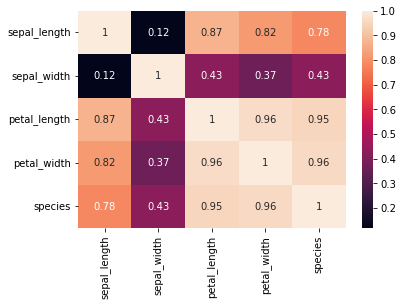

In [28]:
sns.heatmap(df,annot=True)
plt.show()

we find good relationship between petal_length and petal_width
 So we  have overcome our load for testing time. and preventing from overfitting. by Deleting one feature .

In [30]:
data.drop(columns=['petal_length'],inplace=True)

In [31]:
data.head()

,sepal_length,sepal_width,petal_width,species
0,5.1,3.5,0.2,0
1,4.9,3.0,0.2,0
2,4.7,3.2,0.2,0
3,4.6,3.1,0.2,0
4,5.0,3.6,0.2,0


Now we are good to go.  for train test split.

# Standard Scaler No Need.

# Do Train Test Split.

In [33]:
x=data.drop(columns=['species'])
y=data.species

In [32]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=94255)

Lets Write function for checking accuracy..For one time and check any time.

In [44]:
def result_check(cnn,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=cnn.predict(x_train)
        print("================Training  Score==============")
        print("Accuracy Score ===>",accuracy_score(y_train,y_pred)*100)
        
    elif train==False :
        pred=cnn.predict(x_test)
        print("==================TesTing Score=============")
        print("Accuracy Score==> ",accuracy_score(y_test,pred)*100)
        print("Classification Report ==> ",classification_report(y_test,pred))
        

# Model Creation By using Decision Tree 

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report

In [38]:
cnn=DecisionTreeClassifier()

In [39]:
cnn.fit(x_train,y_train)

DecisionTreeClassifier()

In [46]:
result_check(cnn,x_train,x_test,y_train,y_test,train=True)
result_check(cnn,x_train,x_test,y_train,y_test,train=False)

================Training  Score==============
Accuracy Score ===> 100.0
==================TesTing Score=============
Accuracy Score==>  86.8421052631579
Classification Report ==>                precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.87      0.81      0.84        16
           2       0.73      0.80      0.76        10

    accuracy                           0.87        38
   macro avg       0.86      0.87      0.87        38
weighted avg       0.87      0.87      0.87        38



# Lets Check In decision Tree.
# Lets Plot decision tree.

In [48]:
from sklearn import tree

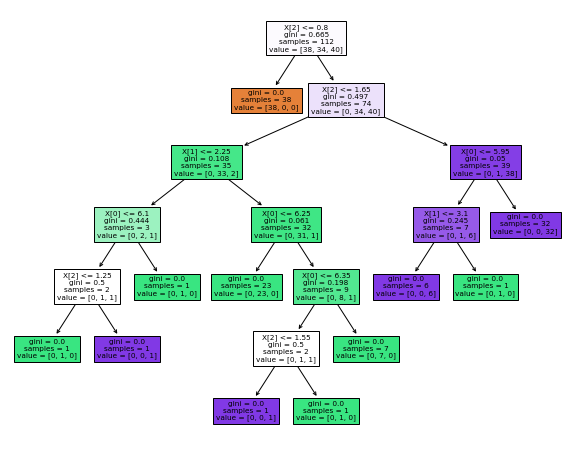

In [49]:
plt.figure(figsize=(10,8))
tree.plot_tree(cnn,filled=True)
plt.show()

Our Model is Best Because we have very less data. So we continue From Here. and Remove Overfitting.

# Hyperparameter Tuning  With the help of GridSearchCV

In [50]:
from sklearn.model_selection import GridSearchCV

In [56]:
best_param={'criterion':['entropy','gini'],
           'min_samples_leaf':range(2,8),
           'min_samples_split':range(2,10),
           'max_depth':range(2,6),
           'max_leaf_nodes':range(2,8)}

In [57]:
grid_search=GridSearchCV(estimator=cnn,param_grid=best_param,cv=5,n_jobs=-1)
grid_search.fit(x_train,y_train)
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 2,
 'max_leaf_nodes': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [58]:
cnn=DecisionTreeClassifier(criterion='entropy',max_depth=2,max_leaf_nodes=3,min_samples_leaf=2,min_samples_split=2)

In [59]:
cnn.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, max_leaf_nodes=3,
                       min_samples_leaf=2)

In [60]:
result_check(cnn,x_train,x_test,y_train,y_test,train=True)
result_check(cnn,x_train,x_test,y_train,y_test,train=False)

================Training  Score==============
Accuracy Score ===> 97.32142857142857
==================TesTing Score=============
Accuracy Score==>  92.10526315789474
Classification Report ==>                precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.88      0.94      0.91        16
           2       0.89      0.80      0.84        10

    accuracy                           0.92        38
   macro avg       0.92      0.91      0.92        38
weighted avg       0.92      0.92      0.92        38



In [61]:
#Lets check Decision Tree Graph

In [62]:
from sklearn import tree

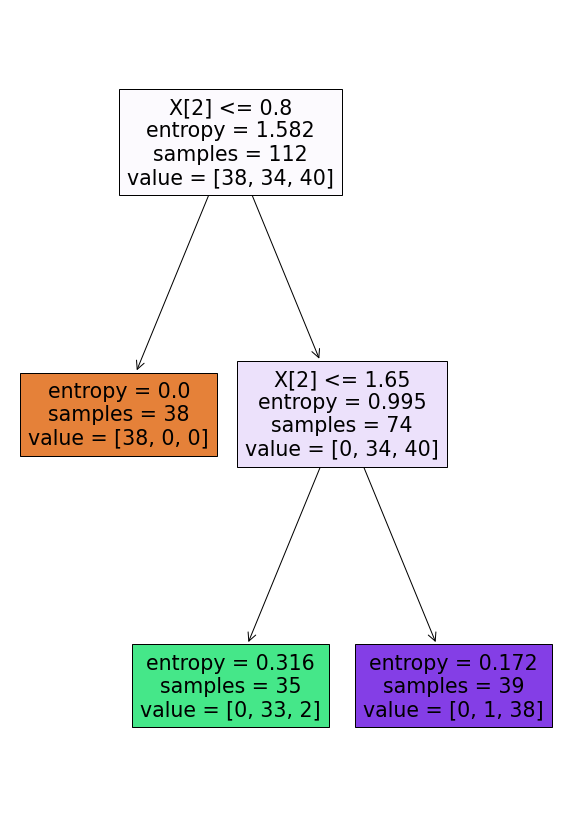

In [63]:
plt.figure(figsize=(10,15))
tree.plot_tree(cnn,filled=True)
plt.show()

# Lets Save Our Model.

In [64]:
import pickle

In [66]:
pickle.dump(cnn,open('Decision Tree','wb'))

In [ ]:
#Student of DataScience 
#Student of DataTrained- Saurav
#Date - 16-09-2022
#Time - 21:17